In [1]:
from networkx.readwrite import json_graph
import pickle, json
import networkx as nx
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
import os

In [2]:
'''保存graph和各种list'''
workpwd = os.getcwd()
save_path = os.path.join(workpwd, "data")

with open(os.path.join(save_path, "G.pkl"), 'rb') as f:
    G = pickle.load(f)
with open(os.path.join(save_path, 'graphs_per_year.pkl'), 'rb') as f:
    graphs_per_year = pickle.load(f)

with open(os.path.join(save_path, 'name_list.pkl'), 'rb') as f:
    name_list = pickle.load(f)
with open(os.path.join(save_path, 'name_dict_list.pkl'), 'rb') as f:
    name_dict_list = pickle.load(f)
with open(os.path.join(save_path, 'name_dict_id_list.pkl'), 'rb') as f:
    name_dict_id_list = pickle.load(f)
with open(os.path.join(save_path, 'affiliation_set.pkl'), 'rb') as f:
    affiliation_set = pickle.load(f)
with open(os.path.join(save_path, 'uid_nameId_list.pkl'), 'rb') as f:
    uid_nameId_list = pickle.load(f)
with open(os.path.join(save_path, 'affiliation_dict.pkl'), 'rb') as f:
    affiliation_dict = pickle.load(f)
with open(os.path.join(save_path, 'affiliation_list.pkl'), 'rb') as f:
    affiliation_list = pickle.load(f)
with open(os.path.join(save_path, 'affiliation_id_list.pkl'), 'rb') as f:
    affiliation_id_list = pickle.load(f)

'''读取MetaData'''
MetaData_path = os.path.join(workpwd, "..", "database", "MetaData.json")
with open(MetaData_path, 'r', encoding='utf-8') as f:
    MetaData = json.load(f)

In [3]:
class Addable_Graph(nx.Graph):
    def __add__(self, other):
        # Implement the addition logic here
        res = self.copy()
        for node in other.nodes:
            if node not in res.nodes:
                res.add_node(node)
            else:
                # res.nodes[node]['affiliation_list'] = name_dict_list[index]
                res.nodes[node]['paper_num'] += other.nodes[node]['paper_num']
                res.nodes[node]['citation'] += other.nodes[node]['citation']
                res.nodes[node]['years'].update(res.nodes[node]['years'])
        for edge in other.edges:
            if edge not in res.edges:
                res.add_edge(edge[0], edge[1], papers=other.edges[edge]['papers'], paper_num_weight=other.edges[edge]['paper_num_weight'], citation_weight=other.edges[edge]['citation_weight'])
            else:
                res[edge[0]][edge[1]]['papers'].update(other[edge[0]][edge[1]]['papers'])
                res[edge[0]][edge[1]]['paper_num_weight'] += other[edge[0]][edge[1]]['paper_num_weight']
                res[edge[0]][edge[1]]['citation_weight'] += other[edge[0]][edge[1]]['citation_weight']
        return res

    def __iadd__(self, other):
        # Implement the addition logic here
        for node in other.nodes:
            if node not in self.nodes:
                self.add_node(node)
            else:
                # res.nodes[node]['affiliation_list'] = name_dict_list[index]
                self.nodes[node]['paper_num'] += other.nodes[node]['paper_num']
                self.nodes[node]['citation'] += other.nodes[node]['citation']
                self.nodes[node]['years'].update(self.nodes[node]['years'])
        for edge in other.edges:
            if edge not in self.edges:
                self.add_edge(edge[0], edge[1], papers=other.edges[edge]['papers'], paper_num_weight=other.edges[edge]['paper_num_weight'], citation_weight=other.edges[edge]['citation_weight'])
            else:
                self[edge[0]][edge[1]]['papers'].update(other[edge[0]][edge[1]]['papers'])
                self[edge[0]][edge[1]]['paper_num_weight'] += other[edge[0]][edge[1]]['paper_num_weight']
                self[edge[0]][edge[1]]['citation_weight'] += other[edge[0]][edge[1]]['citation_weight']
        return self

class Sum_Graph(Addable_Graph):
    def __init__(self, G=None, graphs_per_year=None):
        if graphs_per_year and G:
            super().__init__(G)
            self.graphs_per_year = [Addable_Graph(graph) for graph in graphs_per_year]
            self.y0 = 1980
        else:
            pass

    def year(self, year0, year1=None):
        '''单个年份返回的是引用，多个年份返回的是新建的图'''
        res = self.graphs_per_year[year0-self.y0]
        if year1 and year1 > year0:
            res = res.copy()
            for year in range(year0+1, year1+1):
                res += self.graphs_per_year[year-self.y0]
            return res
        return res

    def affiliation(self, affiliation):
        return self.subgraph(affiliation_id_list[affiliation_dict[affiliation]])

In [4]:
graph_G = Sum_Graph(G, graphs_per_year)

In [5]:
'''删除所有孤立节点'''
isolated_nodes = [node for node in G.nodes() if G.degree(node) == 0]
G_raw = G.copy()
G.remove_nodes_from(isolated_nodes)

{1: 844743, 2: 183292, 4: 24780, 5: 12557, 3: 48824, 8: 3070, 6: 7294, 7: 4399, 9: 2139, 10: 1576, 11: 1109, 38: 12, 39: 8, 69: 1, 14: 478, 13: 611, 12: 838, 16: 291, 40: 13, 15: 369, 19: 175, 52: 5, 17: 217, 21: 103, 24: 76, 20: 148, 87: 1, 26: 77, 171: 1, 27: 51, 18: 225, 28: 42, 45: 9, 33: 14, 22: 103, 25: 51, 23: 105, 30: 27, 29: 30, 34: 17, 44: 3, 42: 8, 46: 5, 85: 1, 55: 1, 41: 13, 32: 22, 57: 4, 90: 1, 35: 6, 36: 15, 31: 20, 84: 1, 47: 3, 50: 4, 54: 2, 89: 1, 76: 1, 37: 12, 51: 7, 68: 1, 60: 2, 91: 1, 59: 3, 48: 2, 49: 5, 43: 6, 77: 1, 56: 1, 66: 2, 53: 2, 67: 3, 62: 2, 103: 1, 136: 1, 75: 1, 72: 1, 96: 1, 61: 1, 65: 1, 64: 2}


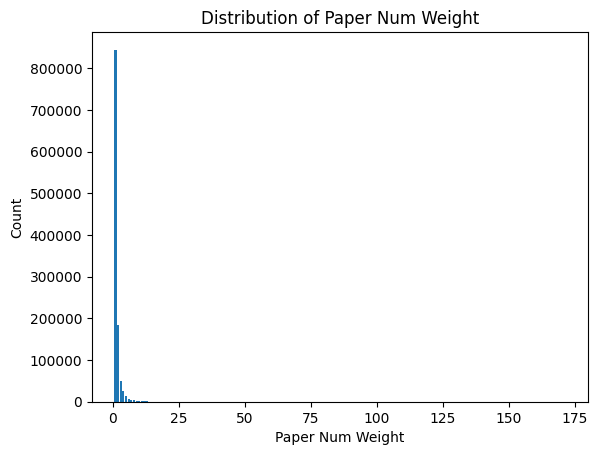

In [6]:
paper_num_weight = [G.edges[edge]['paper_num_weight'] for edge in G.edges()]
paper_num_weight_counts = Counter(paper_num_weight)

paper_num_weight_distribution = dict(paper_num_weight_counts)
print(paper_num_weight_distribution)

plt.bar(paper_num_weight_distribution.keys(), paper_num_weight_distribution.values())
plt.xlabel('Paper Num Weight')
plt.ylabel('Count')
plt.title('Distribution of Paper Num Weight')
plt.show()

{0: 134771, 1: 90116, 2: 86311, 3: 67258, 4: 61082, 5: 51861, 6: 50883, 7: 45489, 8: 54525, 9: 33490, 10: 35496, 11: 26766, 12: 26308, 13: 22541, 14: 23455, 15: 19017, 16: 18605, 17: 17819, 18: 15916, 19: 13443, 20: 16020, 21: 10701, 22: 12008, 23: 12445, 24: 10156, 25: 7688, 26: 8523, 27: 6749, 28: 7626, 29: 5426, 30: 6917, 31: 5304, 32: 4901, 33: 4815, 34: 4960, 35: 3985, 36: 4052, 37: 3915, 38: 4531, 39: 3001, 40: 3344, 41: 2994, 42: 3805, 43: 2631, 44: 3263, 45: 2461, 46: 2459, 47: 1919, 48: 2759, 49: 1840, 50: 3262, 51: 2746, 52: 2024, 53: 1814, 54: 2069, 55: 1476, 56: 1550, 57: 1596, 58: 1855, 59: 1194, 60: 1646, 61: 1114, 62: 1669, 63: 1059, 64: 1391, 65: 916, 66: 929, 67: 791, 68: 1139, 69: 815, 70: 1849, 71: 1002, 72: 811, 73: 785, 74: 1308, 75: 1488, 76: 837, 77: 1162, 78: 756, 79: 549, 80: 558, 81: 574, 82: 542, 83: 519, 84: 736, 85: 832, 86: 506, 87: 423, 88: 485, 89: 395, 90: 404, 91: 362, 92: 444, 93: 383, 94: 407, 95: 386, 96: 517, 97: 303, 98: 324, 99: 333, 100: 297, 10

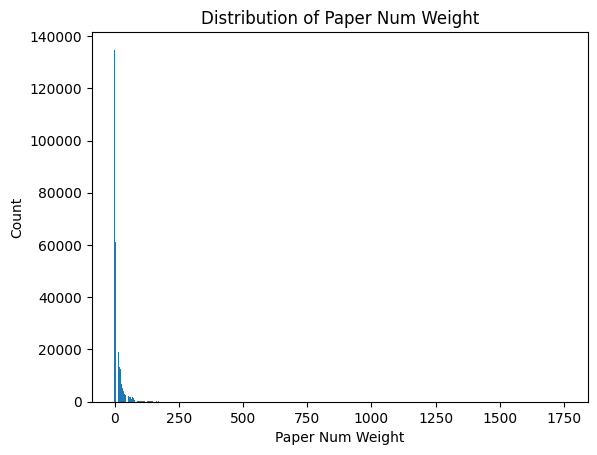

In [7]:
citation_weight = [G.edges[edge]['citation_weight'] for edge in G.edges()]
citation_weight_counts = Counter(citation_weight)

citation_weight_distribution = dict(citation_weight_counts)
sorted_citation_weight_distribution = dict(sorted(citation_weight_distribution.items(), key=lambda x: x[0]))
print(sorted_citation_weight_distribution)

plt.bar(sorted_citation_weight_distribution.keys(), sorted_citation_weight_distribution.values())
plt.xlabel('Paper Num Weight')
plt.ylabel('Count')
plt.title('Distribution of Paper Num Weight')
# Adjust window size based on maximum values of x-axis and y-axis
# plt.xlim(0, max(sorted_citation_weight_distribution.keys()))
# plt.ylim(0, max(sorted_citation_weight_distribution.values()))
plt.show()

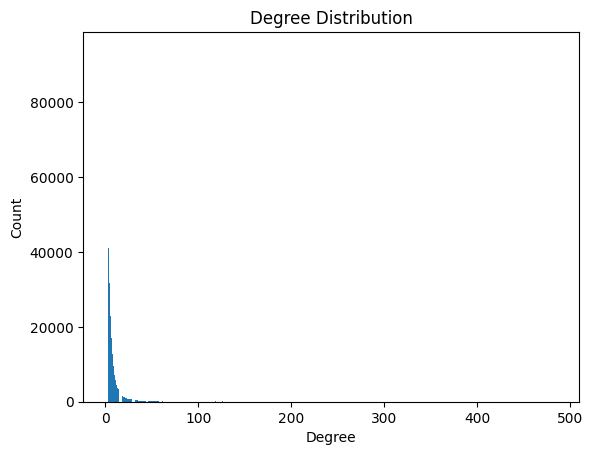

In [8]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = {}
for degree in degree_sequence:
    degree_count[degree] = degree_count.get(degree, 0) + 1

degrees = list(degree_count.keys())
counts = list(degree_count.values())

plt.bar(degrees, counts)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution')
plt.show()

In [9]:
'''引用量最大的连边'''
import heapq
n = 10
nth_largest_edges = heapq.nlargest(n, G.edges(), key=lambda edge: G[edge[0]][edge[1]]['citation_weight'])
max_edge = nth_largest_edges[1]
max_citation_weight = G.edges[max_edge]['citation_weight']
node1, node2 = max_edge

print(f"Edge: {max_edge}")
cite = {}
for uid in G.edges[max_edge]['papers']:
    if MetaData[1][uid]['year'] not in cite:
        cite[MetaData[1][uid]['year']] = [MetaData[1][uid]['citation']]
    else:
        cite[MetaData[1][uid]['year']].append(MetaData[1][uid]['citation'])
    # print(G.edges[max_edge]['papers'][uid])
cite = dict(sorted(cite.items(), key=lambda x: x[0]))
for key, value in cite.items():
    print(key, value)
print(G.edges[max_edge]['paper_num_weight'])
print(G.edges[max_edge]['citation_weight'])
print(f"Sum of citation_weight: {max_citation_weight}")
print(f"Nodes: {node1}, {node2}")
print("Node 1 information:")
print(G.nodes[node1])
print("Node 2 information:")
print(G.nodes[node2])


Edge: (12003, 12006)
2010 [37, 19, 94, 3]
2011 [2, 40, 83]
2012 [1, 31, 8, 5]
2013 [62, 28, 50, 37, 37, 34, 3, 15]
2014 [13]
2015 [5, 23, 139, 18, 81, 3, 6, 5]
2016 [23, 43, 3, 15]
2017 [22, 5, 12]
2018 [6, 0, 7, 12, 12, 2, 2]
2019 [3, 147, 169, 10, 91, 16, 17, 21, 13, 9, 61]
2020 [5, 11, 72, 7, 5]
2021 [2, 15, 0, 20]
2022 [2, 0, 0, 0, 0]
67
1742
Sum of citation_weight: 1742
Nodes: 12003, 12006
Node 1 information:
{'name': '毛静远', 'affiliation_list': ['天津中医药大学第一附属医院'], 'paper_num': 134, 'citation': 3274, 'years': {2016, 2017, 2018, 2019, 2020, 2021, 2022, 2010, 2011, 2012, 2013, 2014, 2015}}
Node 2 information:
{'name': '王贤良', 'affiliation_list': ['天津中医药大学第一附属医院'], 'paper_num': 102, 'citation': 2487, 'years': {2016, 2017, 2018, 2019, 2020, 2021, 2022, 2010, 2011, 2012, 2013, 2014, 2015}}


In [10]:
'''引用量最大的n个节点'''
top_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]['citation'], reverse=True)[:100]
for node in top_nodes:
    print(node)

(63358, {'name': '张声生', 'affiliation_list': ['中华中医药学会脾胃病分会'], 'paper_num': 27, 'citation': 8839, 'years': {2017, 2019, 2010, 2011, 2012}})
(4354, {'name': '秦雪梅', 'affiliation_list': ['山西大学中医药现代研究中心'], 'paper_num': 318, 'citation': 6643, 'years': {2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}})
(7741, {'name': '张伯礼', 'affiliation_list': ['天津中医药大学'], 'paper_num': 187, 'citation': 4962, 'years': {2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2009, 2010, 2011, 2012, 2013, 2014, 2015}})
(31298, {'name': '王琦', 'affiliation_list': ['北京中医药大学基础医学院'], 'paper_num': 109, 'citation': 4760, 'years': {2016, 2017, 2007, 2008, 2010, 2011, 2012, 2013, 2014, 2015}})
(10374, {'name': '常小荣', 'affiliation_list': ['湖南中医药大学'], 'paper_num': 178, 'citation': 4320, 'years': {2016, 2017, 2018, 2019, 2020, 2021, 2022, 2010, 2011, 2012, 2013, 2014, 2015}})
(5202, {'name': '孙蓉', 'affiliation_list': ['山东省中医药研究院'], 'paper_num': 273, 'citation': 4219, 'years': {2016, 

In [11]:
'''引用量最大的节点的文章'''
n = 12284
node_edges = []
for edge in G.edges():
    if n in edge:
        node_edges.append(edge)
        print(f"Edge: {edge}")
        print(G.edges[edge])
        print(MetaData[1][list(G.edges[edge]['papers'].keys())[0]])
        print(f"Nodes: {edge[0]}, {edge[1]}")
        print(G.nodes[edge[0]])
        print(G.nodes[edge[1]])
        print()

Edge: (12282, 12284)
{'papers': {'01d7b8ab9356b92a08ba22bef7ca4ba81cd033df6c6e66e6b7690b4ca4a634be': {'year': 2017, 'citation': 3, 'name_id_list': [12282, 12283, 12284], 'name_id_len': 3}}, 'paper_num_weight': 1, 'citation_weight': 3}
{'title': '后路内外侧联合入路治疗后Pilon骨折', 'authors': ['王正1', '程建2', '冯欢欢1'], 'year': 2017, 'province': ['江苏'], 'affiliations': ['南京中医药大学太仓附属医院骨科', '东南大学医学院附属徐州医院骨科'], 'journal': '骨科', 'keywords': ['PILON骨折', '联合入路', '内外踝骨折', '治疗', '外侧', '后路', '损伤程度', '踝关节骨折'], 'source': '南京中医药大学太仓附属医院骨科；东南大学医学院附属徐州医院骨科  2017  第8卷  第5期  407-409    ', 'abstract': '随着建筑业的发展,高处坠落产生垂直压缩及旋转暴力致使力作用于较大的胫骨远端后方,造成内外踝骨折伴胫骨关节面压缩,现代骨折将其定义为后Pilon骨折[1]。后Plion骨折是一种由中等能量损伤造成的特殊骨折类型,损伤程度介于踝关节骨折与传统Pilon骨折之间,其骨折线贯穿整个后踝冠状面,累及内踝后丘,甚至延伸至内踝前丘,后踝关节面塌陷伴内踝及外踝骨折。因后Pilon骨折位置特殊,且踝关节后方应用钢板螺钉', 'link': 'http://fx.sjtulib.superlib.net/detail_38502727e7500f26384b635bdff986c81fed5f0ce99389ee1921b0a3ea255101fc1cf1fbb4666ae67bd2d33ebc1de24fab789cc878777d34ff9bc90bd83307f598de61d83815243a8a68024ea3e7a8b6', 'citation':

In [12]:
'''统计年份以及年份的分布'''
year_counts = Counter([data['year'] for data in MetaData[1].values()])
print(sorted(list(year_counts.keys())))
sorted_year_counts = dict(sorted(year_counts.items(), key=lambda x: x[0], reverse=True))
for year, count in sorted_year_counts.items():
    print(year, count)
articles = [article for article in MetaData[1].values() if article['year'] < 2000 or article['year'] > 2024]
for article in articles:
    print(article['year'],article)

[1960, 1962, 1966, 1967, 1976, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2038, 2046, 2066, 2082, 2083]
2083 4
2082 2
2066 1
2046 39
2038 1
2024 8
2023 1725
2022 34417
2021 35580
2020 35338
2019 33915
2018 33244
2017 33820
2016 34268
2015 34911
2014 36009
2013 35043
2012 32452
2011 29595
2010 27302
2009 1317
2008 1141
2007 884
2006 723
2005 533
2004 423
2003 219
2002 225
2001 186
2000 219
1999 178
1998 135
1997 135
1996 165
1995 145
1994 124
1993 86
1992 60
1991 51
1990 51
1989 48
1988 44
1987 50
1986 34
1985 42
1984 41
1983 22
1982 16
1981 25
1980 29
1976 131
1967 1
1966 1
1962 1
1960 6
1988 {'title': '中药性能与金属元素含量', 'authors': ['陈和利1', '刘晓瑜2'], 'affiliations': ['江西中医学院', '江西省卫校'], 'journal': '中草药杂志', 'keywords': [], 'source': '江西中医学院；江西省卫校\xa0\xa01988\xa0\xa0第4期

In [13]:
'''度数最大的n个节点'''
n = 1000
top_n_nodes = sorted(list(graph_G.nodes()), key=lambda x: graph_G.degree(x), reverse=True)[:n]
for node in top_n_nodes:
    print(name_list[node], graph_G.degree(node), G.nodes[node]['affiliation_list'])

谢雁鸣 485 ['中国中医科学院中医临床基础医学研究所']
秦雪梅 445 ['山西大学中医药现代研究中心']
张伯礼 392 ['天津中医药大学']
刘建平 351 ['北京中医药大学循证医学中心']
杨关林 349 ['辽宁中医药大学']
胡思源 332 ['天津中医药大学第一附属医院']
常小荣 296 ['湖南中医药大学针灸推拿学院']
毛德文 285 ['广西中医药大学第一附属医院']
张艺 280 ['成都中医药大学民族医药学院']
郭义 276 ['天津中医药大学']
刘清泉 275 ['首都医科大学附属北京中医医院']
马融 272 ['天津中医药大学第一附属医院']
何清湖 267 ['湖南中医药大学']
孙蓉 258 ['山东省中医药研究院']
石岩 257 ['辽宁中医药大学']
常小荣 257 ['湖南中医药大学']
谢春光 255 ['成都中医药大学附属医院']
梁繁荣 253 ['成都中医药大学']
王伟 253 ['北京中医药大学']
孙忠人 253 ['黑龙江中医药大学']
康廷国 252 ['辽宁中医药大学药学院']
张允岭 252 ['北京中医药大学东方医院']
梁繁荣 252 ['成都中医药大学针灸推拿学院']
刘铜华 246 ['北京中医药大学']
陆兔林 236 ['南京中医药大学药学院']
于春泉 235 ['天津中医药大学']
仝小林 230 ['中国中医科学院广安门医院']
章薇 229 ['湖南中医药大学第一附属医院']
马贤德 228 ['辽宁中医药大学']
李新民 228 ['天津中医药大学第一附属医院']
王雪峰 226 ['辽宁中医药大学附属医院']
雷海民 223 ['北京中医药大学中药学院']
张俊华 219 ['天津中医药大学']
商洪才 217 ['北京中医药大学东直门医院']
郭蓉娟 216 ['北京中医药大学东方医院']
吴效科 215 ['黑龙江中医药大学附属第一医院']
倪健 213 ['北京中医药大学中药学院']
吕圭源 212 ['浙江中医药大学']
杨忠奇 211 ['广州中医药大学第一附属医院']
王庆国 208 ['北京中医药大学']
徐伟 208 ['福建中医药大学药学院']
杜守颖 207 ['北京中医药大学中药学院']
周亚滨 207 ['黑龙江中医药大学附属第一医院']
刘

In [14]:
'''度数最大的n个节点的度数随年份的变化'''
degree_by_year = {}
for id in top_n_nodes:
    degree_by_year[name_list[id]] = {}
    for year in [2000+i for i in range(24)]:
        if id in graph_G.year(year):
            degree_by_year[name_list[id]][year] = graph_G.year(year).degree(id)
degree_by_year

{'谢雁鸣': {2009: 3,
  2010: 16,
  2011: 25,
  2012: 35,
  2013: 23,
  2014: 32,
  2015: 30,
  2016: 54,
  2017: 40,
  2018: 80,
  2019: 157,
  2020: 49,
  2021: 52,
  2022: 92},
 '秦雪梅': {2008: 3,
  2009: 10,
  2010: 13,
  2011: 16,
  2012: 26,
  2013: 20,
  2014: 32,
  2015: 49,
  2016: 44,
  2017: 69,
  2018: 81,
  2019: 60,
  2020: 104,
  2021: 48,
  2022: 40,
  2023: 24},
 '张伯礼': {2009: 3,
  2010: 70,
  2011: 37,
  2012: 30,
  2013: 39,
  2014: 20,
  2015: 23,
  2016: 16,
  2017: 16,
  2018: 61,
  2019: 10,
  2020: 56,
  2021: 34,
  2022: 70,
  2023: 1},
 '刘建平': {2021: 126},
 '杨关林': {2010: 3,
  2011: 33,
  2012: 15,
  2013: 41,
  2014: 41,
  2015: 24,
  2016: 60,
  2017: 58,
  2018: 67,
  2019: 83,
  2020: 85,
  2021: 65,
  2022: 68},
 '胡思源': {2010: 27,
  2011: 26,
  2012: 22,
  2013: 9,
  2014: 23,
  2015: 41,
  2016: 36,
  2017: 49,
  2018: 83,
  2019: 59,
  2020: 44,
  2021: 42,
  2022: 16},
 '常小荣': {2010: 31,
  2011: 37,
  2012: 22,
  2013: 48,
  2014: 43,
  2015: 32,
  2016: 42,


In [21]:
# 对graph_G进行社区划分
import community

'''最大连通子图'''
node_subset = []
for affiliation in affiliation_list:
    if '北京中医药大学' not in affiliation:
        continue
    node_subset.extend(affiliation_id_list[affiliation_dict[affiliation]])
raw_graph = G.subgraph(node_subset)
# raw_graph = G.subgraph(affiliation_id_list[affiliation_dict['北京中医药大学']])
# raw_graph = graph_G.affiliation('北京中医药大学')
max_connected_component = max(nx.connected_components(raw_graph), key=len)
print(len(max_connected_component), len(raw_graph.nodes()), type(max_connected_component))
max_connected_component_G = raw_graph.subgraph(max_connected_component)

partition = community.best_partition(max_connected_component_G)

20264 25050 <class 'set'>


In [22]:
# Print the number of communities
num_communities = len(set(partition.values()))
print("Number of communities:", num_communities)

Number of communities: 61


In [23]:
# 生成一个社区的字典，格式为{社区编号: [节点1, 节点2, ...]}
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = [node]
    else:
        communities[community_id].append(node)
communities

{41: [262154,
  786444,
  131885,
  132050,
  1353,
  1354,
  1356,
  1357,
  1355,
  1368,
  1821,
  657256,
  132997,
  2958,
  2959,
  2960,
  2961,
  2962,
  789569,
  265284,
  134455,
  3443,
  3976,
  266283,
  659598,
  659713,
  135571,
  266751,
  266754,
  266855,
  529055,
  136563,
  136764,
  5888,
  5889,
  5890,
  5891,
  5892,
  268308,
  268309,
  268310,
  268311,
  268312,
  268313,
  6330,
  6331,
  6370,
  530742,
  268752,
  793051,
  531152,
  269231,
  269232,
  401225,
  794616,
  270526,
  270527,
  139623,
  401829,
  795184,
  533124,
  8873,
  271066,
  9248,
  9249,
  9250,
  665523,
  141247,
  141248,
  403508,
  403511,
  534992,
  534993,
  11060,
  11062,
  273244,
  273245,
  666930,
  404859,
  404860,
  143153,
  143154,
  667755,
  12411,
  12412,
  12413,
  274588,
  274589,
  274675,
  12606,
  12607,
  12608,
  537518,
  275625,
  144787,
  144788,
  144789,
  13789,
  13790,
  13791,
  13792,
  13793,
  14268,
  276642,
  145634,
  670458,
  

In [24]:
# Print the size of each community
community_sizes = {}
for node, community_id in partition.items():
    if community_id not in community_sizes:
        community_sizes[community_id] = 1
    else:
        community_sizes[community_id] += 1
print("Community sizes:", (list(community_sizes.values())))

Community sizes: [723, 683, 659, 427, 457, 860, 840, 278, 645, 798, 407, 171, 151, 270, 899, 302, 532, 425, 285, 152, 106, 169, 96, 296, 564, 335, 443, 659, 397, 706, 111, 202, 223, 23, 182, 266, 271, 523, 430, 310, 419, 90, 167, 283, 188, 128, 292, 300, 179, 462, 368, 175, 414, 82, 64, 140, 84, 75, 17, 24, 37]


In [25]:
# Print the authors in each community
community_authors = {}
i = 0
for node, community_id in partition.items():
    i += 1
    if i > 5000:
        break
    author_name = name_list[node]
    if community_id not in community_authors:
        community_authors[community_id] = [author_name]
    else:
        community_authors[community_id].append(author_name)
# community_authors

In [26]:
'''计算每个社区的连边数量'''
community_edges = {}
for edge in max_connected_component_G.edges():
    node1, node2 = edge
    community1 = partition[node1]
    community2 = partition[node2]
    if community1 == community2:
        if community1 not in community_edges:
            community_edges[community1] = 1
        else:
            community_edges[community1] += 1
# community_edges

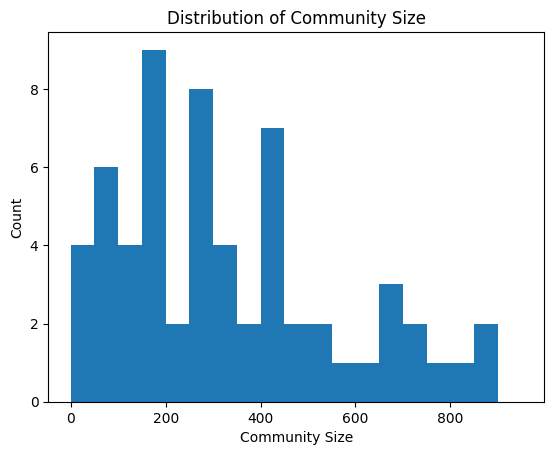

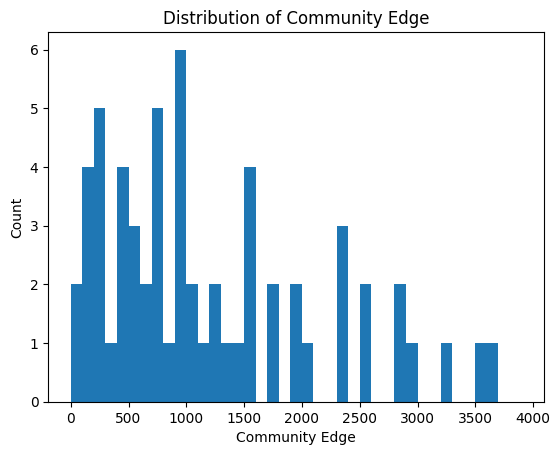

In [27]:
# 以50为一组，使用matplotlib画出community_sizes的分布直方图、累积分布图
import numpy as np
import matplotlib.pyplot as plt

# 计算每个社区的大小
community_sizes_list = list(community_sizes.values())
# 计算每个社区的连边数量
community_edges_list = list(community_edges.values())

# 画出社区大小的分布直方图
plt.hist(community_sizes_list, bins=range(0, 1000, 50))
plt.xlabel('Community Size')
plt.ylabel('Count')
plt.title('Distribution of Community Size')
plt.show()

# 画出社区连边数量的分布直方图
plt.hist(community_edges_list, bins=range(0, 4000, 100))
plt.xlabel('Community Edge')
plt.ylabel('Count')
plt.title('Distribution of Community Edge')
plt.show()

In [28]:
'''计算每个社区的连边数量随时间的变化'''
community_edges_by_year = {community: [] for community in communities.keys()}
for year in range(2000, 2023):
    G_year = graph_G.year(year)
    for community in communities.keys():
        community_edges_by_year[community].append(G_year.subgraph(communities[community]).number_of_edges())
community_edges_by_year

{41: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  89,
  135,
  121,
  190,
  155,
  176,
  144,
  335,
  156,
  441,
  439,
  576,
  502],
 1: [0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  57,
  125,
  152,
  196,
  260,
  261,
  206,
  348,
  235,
  326,
  609,
  414,
  537],
 2: [0,
  0,
  0,
  0,
  0,
  0,
  3,
  1,
  0,
  10,
  180,
  240,
  244,
  241,
  335,
  452,
  277,
  329,
  322,
  292,
  421,
  395,
  339],
 3: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  73,
  87,
  115,
  90,
  105,
  158,
  159,
  213,
  250,
  250,
  108,
  239,
  97],
 4: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  68,
  52,
  93,
  64,
  86,
  175,
  144,
  161,
  171,
  179,
  345,
  271,
  311],
 5: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  8,
  0,
  363,
  490,
  426,
  402,
  624,
  702,
  1061,
  560,
  114,
  74,
  56,
  51,
  31],
 6: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  202,
  248,
  217,
  432,
  755,
  759,
  579,
  713,
  585,
  364,
  551,
  508,
  375

In [29]:
'''统计每个社区中的作者的总的度数，以及该作者在社区中的度数'''
community_author_degree = {community: [] for community in communities.keys()}
a = 0
b = 0
for community in communities.keys():
    for node in communities[community]:
        a += graph_G.subgraph(communities[community]).degree(node)
        b += graph_G.degree(node)
        community_author_degree[community].append((graph_G.subgraph(communities[community]).degree(node), graph_G.degree(node)))
community_author_degree, a, b, a/b

({41: [(5, 9),
   (5, 5),
   (2, 4),
   (4, 4),
   (12, 16),
   (19, 29),
   (13, 18),
   (9, 11),
   (6, 6),
   (6, 6),
   (17, 24),
   (1, 1),
   (3, 3),
   (1, 1),
   (6, 11),
   (3, 3),
   (3, 3),
   (11, 36),
   (1, 4),
   (1, 4),
   (5, 5),
   (43, 102),
   (8, 19),
   (5, 5),
   (6, 6),
   (2, 2),
   (3, 3),
   (5, 5),
   (1, 1),
   (8, 8),
   (2, 2),
   (4, 4),
   (3, 3),
   (34, 70),
   (59, 105),
   (36, 50),
   (19, 27),
   (71, 152),
   (8, 8),
   (10, 11),
   (10, 11),
   (11, 12),
   (12, 14),
   (7, 7),
   (10, 16),
   (1, 2),
   (7, 47),
   (1, 1),
   (4, 5),
   (4, 4),
   (1, 1),
   (11, 16),
   (2, 2),
   (18, 19),
   (1, 1),
   (4, 5),
   (4, 5),
   (2, 7),
   (3, 6),
   (2, 5),
   (1, 2),
   (44, 71),
   (3, 3),
   (15, 18),
   (4, 4),
   (3, 9),
   (1, 1),
   (1, 1),
   (13, 13),
   (7, 7),
   (6, 6),
   (6, 8),
   (6, 8),
   (17, 57),
   (10, 27),
   (5, 6),
   (5, 5),
   (1, 1),
   (15, 15),
   (10, 10),
   (5, 5),
   (3, 3),
   (5, 6),
   (4, 4),
   (10, 17),
  

In [30]:
# 统计每个社区的文章列表
community_papers = {community: set() for community in communities.keys()}
community_papers_names = {community: set() for community in communities.keys()}
for community in communities.keys():
    for node in communities[community]:
        for edge in graph_G.subgraph(communities[community]).edges(node):
            for uid in graph_G.subgraph(communities[community]).edges[edge]['papers']:
                if uid not in community_papers[community]:
                    community_papers[community].add(uid)
                    community_papers_names[community].add(MetaData[1][uid]['title'])
community_papers_names, {community: len(papers) for community, papers in community_papers.items()}

({41: {'"课程思政"理念下中医内科课程协同育人的路径探索',
   '"鸡尾酒"疗法治疗儿童原发免疫性血小板减少症临床疗效观察 ',
   '167例进展期胃癌中医证型研究分析 ',
   '199例慢性荨麻疹患者兼夹体质类型的分布与演变规律',
   '260例慢性荨麻疹患者体质分布特点及变化倾向',
   '260例慢性荨麻疹患者体质分布特点及变化倾向 ',
   '2型糖尿病合并高脂血症患者中医体质类型及与血脂指标的相关性研究 ',
   '318例寻常痤疮患者中医体质类型分析 ',
   '448株肺炎克雷伯菌临床分布特点与耐药性分析',
   '5-HT2A T102C基因多态性与阿尔茨海默病精神行为症状关系的meta分析',
   'AECOPD呼吸衰竭中医证素、证候的分布及与胃肠功能障碍相关研究 ',
   'AECOPD大鼠模型气道黏液高分泌与肺功能的相关性研究 ',
   'AS-PCR法检测CLU基因SNP位点方法的建立',
   'CD4+T细胞迁移在哮喘小鼠“肺合大肠”的初探①',
   'HIV感染/AIDS患者合并带状疱疹的研究进展 ',
   'ICU肺动脉高压患者右心功能的超声研究 ',
   'NF-κB和RBP-Jκ在大鼠肝再生过程中的作用及苦参碱的调节机制 ',
   '“三通法”治疗痤疮',
   '“从咽论治”探讨刺营放血法治疗寻常型银屑病血热证的机制',
   '“从脾论治方”对原发免疫性血小板减少症小鼠血管活性因子的影响',
   '“天竺国按摩法”调身机理探究 ',
   '“有胃气则生”理论在恶性血液病化疗患者中的应用',
   '“疑古思潮”与“伤寒错简派”的兴起 ',
   '“脉象预测”与抑郁症及其复发的关系探讨 ',
   '“金水相生”理论在肺癌恶性胸腔积液中的应用探讨',
   '“鸡尾酒”疗法治疗持续及慢性ITP儿童患者22例 ',
   '《中医血液病名词术语整理与诠释》研究思路探讨 ',
   '《医方考》中大黄的应用规律研究',
   '《古今医统大全》治疗咳嗽用药规律分析',
   '《慈禧光绪医方选议》运用膏方调治脾胃病特色探析',
   '《诸病源候论》中导引起始姿势探析 ',
   '《诸病源候论》便秘导引法研究 ',
   '《黄帝内经》“神”的内涵探析',
   '《黄帝内经》

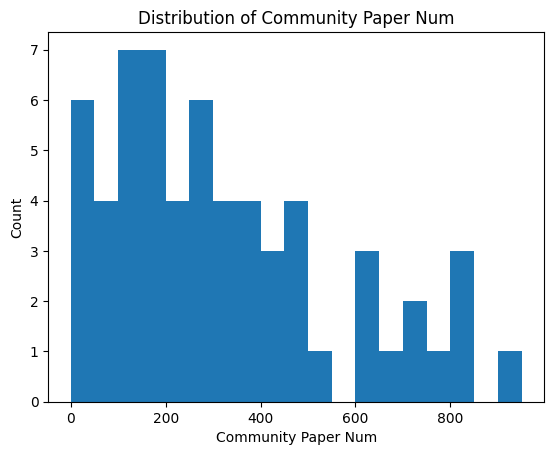

In [31]:
community_paper_num = {community: len(papers) for community, papers in community_papers.items()}
# 画出社区大小的分布直方图
plt.hist(list(community_paper_num.values()), bins=range(0, 1000, 50))
plt.xlabel('Community Paper Num')
plt.ylabel('Count')
plt.title('Distribution of Community Paper Num')
plt.show()

In [32]:
# 统计每个社区的文章的关键词列表
community_keywords = {community: {} for community in communities.keys()}
for community in communities.keys():
    for uid in community_papers[community]:
        for keyword in MetaData[1][uid]['keywords']:
            if keyword not in community_keywords[community]:
                community_keywords[community][keyword] = 1
            else:
                community_keywords[community][keyword] += 1
# {community: {keyword:times for keyword, times in } for community, keywords in community_keywords.items()}
for i in range(len(community_keywords)):
    # keywords格式为{keyword: times}，根据times排序
    keywords = {keyword: times for keyword, times in community_keywords[i].items()}
    sorted_keywords = dict(sorted(keywords.items(), key=lambda x: x[1], reverse=True))
    print(i, sorted_keywords)

0 {'慢性咳嗽': 18, '中医药': 18, 'Meta分析': 15, '冠心病': 13, '新型冠状病毒肺炎': 13, '中医证候': 11, '证候要素': 10, '网络药理学': 10, '中医': 10, '中西医结合': 10, '慢性心力衰竭': 10, '病机': 9, '高血压': 9, '辨证论治': 9, '证候': 9, '数据挖掘': 9, '益气凉血生肌方': 8, '心力衰竭': 8, '作用机制': 7, '中医证型': 7, '病因病机': 7, '聚类分析': 7, '冠心病心绞痛': 7, '参连复脉颗粒': 6, '因子分析': 6, '量表': 6, '祛风宣肺方': 6, '抑郁症': 6, '慢性乙型肝炎': 6, '黄芪': 5, '生活质量': 5, '治疗': 5, '室性期前收缩': 5, '气道神经源性炎症': 5, '慢性阻塞性肺疾病': 5, '中医药疗法': 5, '随机对照试验': 5, '咳嗽变异性哮喘': 5, '风邪伏肺': 5, '心肌纤维化': 5, '心血管疾病': 5, '证候类型': 5, '综述': 5, '针灸': 5, '细胞凋亡': 5, '用药规律': 5, '脓毒症': 5, '心房颤动': 4, '心绞痛': 4, '肺脾相关': 4, '急性心肌梗死': 4, '五运六气': 4, '黄芪注射液': 4, '乙型肝炎': 4, '肝硬化': 4, '气血理论': 4, '中医治疗': 4, '膜性肾病': 4, '气道黏液高分泌': 4, '高血压病': 4, '中药': 4, '葛根素注射液': 4, '舒张功能障碍': 4, '血脂': 4, '安全性': 4, '溃疡性结肠炎': 4, '关联规则': 4, '中医传承辅助平台': 4, '胸痹': 4, '糖尿病心肌病': 4, '信号通路': 4, '甲型流感': 4, '中医护理': 4, '益气活血': 4, '肾间质纤维化': 3, '经皮冠状动脉介入治疗': 3, '难治性慢性咳嗽': 3, '支气管哮喘': 3, '茵陈蒿汤': 3, '肝病': 3, '证素': 3, '中医病机': 3, '林谦': 3, '心律失常': 3, '恢复期': 3, '经验': 3, '咳嗽敏感性增高': 

In [33]:
# 获取社区中度数最大的n个节点
n = 5
top_n_nodes = {}
for community in communities.keys():
    top_n_nodes[community] = sorted(list(communities[community]), key=lambda x: graph_G.subgraph(communities[community]).degree(x), reverse=True)[:n]
# 最大n个节点的度数随年份的变化
degree_by_year = {}
for community in communities.keys():
    degree_by_year[community] = {}
    for year in [2000+i for i in range(23)]:
        for node in top_n_nodes[community]:
            if node in graph_G.year(year):
                if name_list[node] not in degree_by_year[community]:
                    degree_by_year[community][name_list[node]] = [0]*23
                degree_by_year[community][name_list[node]][year-2000] = graph_G.year(year).degree(node)
for community in communities.keys():
    print(community)
    print(community_edges_by_year[community])
    for node in top_n_nodes[community]:
        print(name_list[node], degree_by_year[community][name_list[node]])

41
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 89, 135, 121, 190, 155, 176, 144, 335, 156, 441, 439, 576, 502]
陈信义 [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 12, 10, 20, 11, 21, 33, 15, 28, 25, 24, 28, 32, 18]
张雅月 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 7, 6, 4, 3, 1, 13, 14, 26, 8, 29, 26]
段行武 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 4, 2, 13, 13, 8, 29, 5, 22, 1, 18, 12]
侯丽 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 7, 0, 8, 20, 4, 17, 16, 21, 26, 26, 25]
张立山 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 2, 23, 5, 5, 1, 4, 8, 1, 2, 22, 30]
1
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 57, 125, 152, 196, 260, 261, 206, 348, 235, 326, 609, 414, 537]
王庆国 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29, 56, 33, 25, 17, 32, 25, 24, 33, 16, 29, 24, 16]
谷晓红 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 10, 21, 28, 11, 17, 7, 15, 18, 15, 30, 23, 26]
王雪茜 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 9, 11, 9, 24, 33, 25, 23, 25, 24, 18, 24]
程发峰 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 6, 19, 14, 9, 18, 25, 20, 20]
翟双庆 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 13, 13, 24, 13, 7, 14, 1

In [34]:
# 将degree_by_year中同一社区中不同作者的数组相加
degree_by_year_sum = {}
for community in degree_by_year.keys():
    degree_by_year_sum[community] = [0]*23
    for tmp in degree_by_year[community].values():
        for i in range(len(tmp)):
            degree_by_year_sum[community][i] += tmp[i]
# for community in communities.keys():
#     degree_by_year_sum[community] = [0]*23
#     for tmp in community
#     for node in communities[community]:
#         degree_by_year_sum[community] = [x+y for x, y in zip(degree_by_year_sum[community], degree_by_year[community][node])]
for community in communities.keys():
    print(community)
    print(community_edges_by_year[community])
    print(degree_by_year_sum[community])
#     for node in top_n_nodes[community]:
#         print(name_list[node], degree_by_year[community][name_list[node]])
# degree_by_year_sum

41
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 89, 135, 121, 190, 155, 176, 144, 335, 156, 441, 439, 576, 502]
[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 16, 29, 40, 42, 51, 74, 29, 91, 68, 94, 65, 127, 111]
1
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 57, 125, 152, 196, 260, 261, 206, 348, 235, 326, 609, 414, 537]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 35, 82, 76, 81, 61, 92, 91, 92, 95, 82, 136, 104, 110]
2
[0, 0, 0, 0, 0, 0, 3, 1, 0, 10, 180, 240, 244, 241, 335, 452, 277, 329, 322, 292, 421, 395, 339]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 112, 151, 124, 147, 214, 224, 166, 127, 66, 82, 109, 84, 55]
3
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 73, 87, 115, 90, 105, 158, 159, 213, 250, 250, 108, 239, 97]
[0, 0, 0, 0, 0, 3, 3, 0, 0, 4, 83, 96, 113, 50, 51, 55, 66, 115, 129, 72, 59, 70, 9]
4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 68, 52, 93, 64, 86, 175, 144, 161, 171, 179, 345, 271, 311]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 21, 20, 21, 19, 45, 33, 29, 34, 24, 43, 42, 44]
5
[0, 0, 0, 0, 0, 0, 0, 1, 8, 0, 363, 490, 426, 402, 624, 702, 1061, 560, 114, 74, 56, 

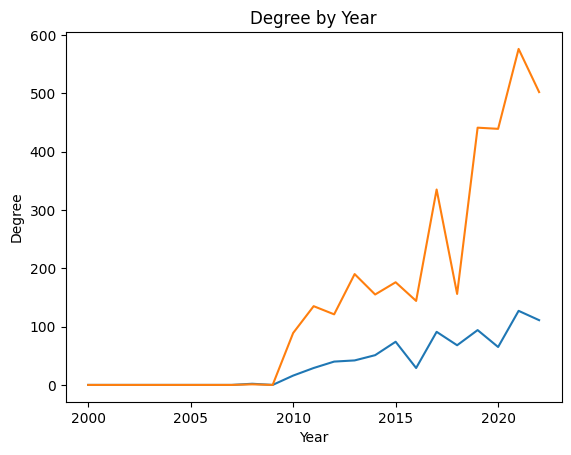

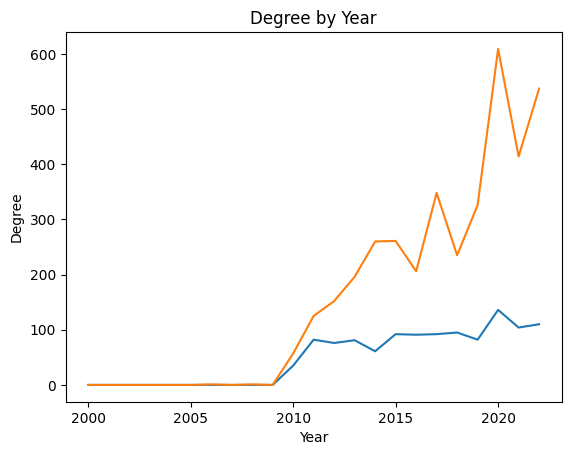

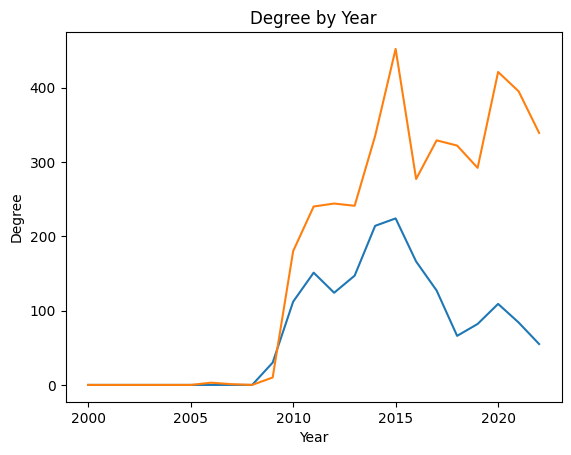

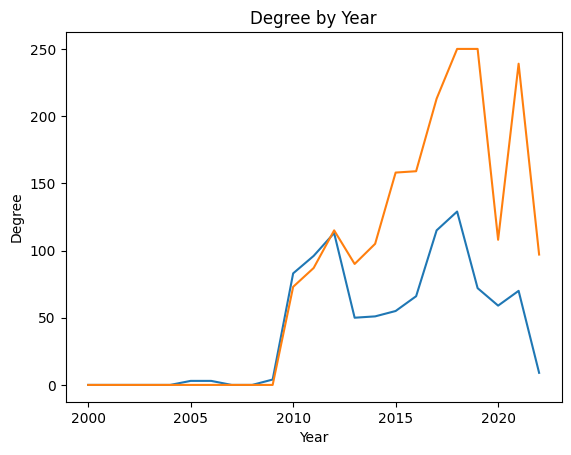

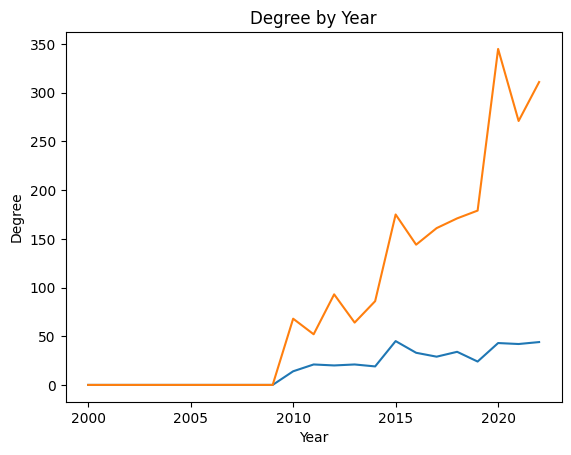

In [36]:
# 对于各个value，打印degree_by_year_sum的折线图
import matplotlib.pyplot as plt

# Iterate over each value in degree_by_year_sum
for community in list(degree_by_year_sum.keys())[:5]:
    # Plot the line graph
    plt.plot(range(2000, 2023), degree_by_year_sum[community])
    plt.plot(range(2000,2023), community_edges_by_year[community])

    # Add labels and title to the graph
    plt.xlabel('Year')
    plt.ylabel('Degree')
    plt.title('Degree by Year')

    # Display the graph
    plt.show()


In [37]:
# 获取社区中度数最大的n个节点
n = 1
average = [0] *10
for n in range(1, 10):
    top_n_nodes = {}
    for community in communities.keys():
        top_n_nodes[community] = sorted(list(communities[community]), key=lambda x: graph_G.subgraph(communities[community]).degree(x), reverse=True)[:n]
    # 最大n个节点的度数随年份的变化
    degree_by_year = {}
    for community in communities.keys():
        degree_by_year[community] = {}
        for year in [2000+i for i in range(23)]:
            for node in top_n_nodes[community]:
                if node in graph_G.year(year):
                    if name_list[node] not in degree_by_year[community]:
                        degree_by_year[community][name_list[node]] = [0]*23
                    degree_by_year[community][name_list[node]][year-2000] = graph_G.year(year).degree(node)

    # 将degree_by_year中同一社区中不同作者的数组相加
    degree_by_year_sum = {}
    for community in degree_by_year.keys():
        degree_by_year_sum[community] = [0]*23
        for tmp in degree_by_year[community].values():
            for i in range(len(tmp)):
                degree_by_year_sum[community][i] += tmp[i]

    from scipy.stats import pearsonr
    from statistics import mean

    # 对于每一个community，计算degree_by_year_sum和community_edges_by_year的相关度
    correlations = {}
    for community in degree_by_year_sum.keys():
        correlation, _ = pearsonr(degree_by_year_sum[community][10:], community_edges_by_year[community][10:])
        correlations[community] = correlation
    average[n-1] = mean(list(correlations.values()))
average = average[0:-1]
average

[0.5659411964773643,
 0.65192937286769,
 0.6934871223270922,
 0.7383533580774708,
 0.7656905371895858,
 0.7836746553005294,
 0.8010625498434065,
 0.8090815526017174,
 0.8260875030459544]

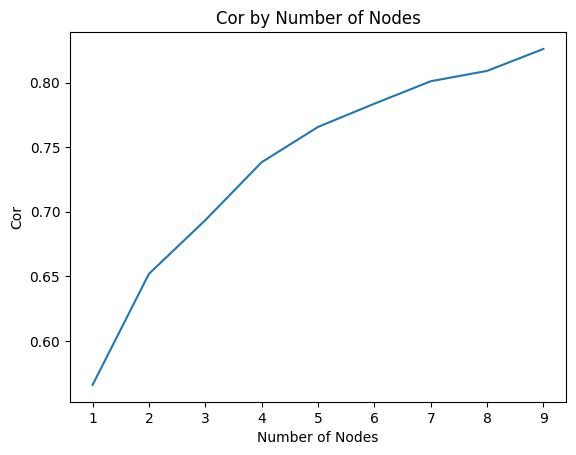

In [38]:
# 画出average的折线图
import matplotlib.pyplot as plt

# Plot the line graph
plt.plot(range(1, len(average)+1), average)

# Add labels and title to the graph
plt.xlabel('Number of Nodes')
plt.ylabel('Cor')
plt.title('Cor by Number of Nodes')

# Display the graph
plt.show()
